# This will be a simple notebook to try and challenge the model created in 
#### https://github.com/acantril/learn-cantrill-io-labs/tree/master/aws-pet-rekognition-ecr
##### Description to be update
* Ample documentation and comparisons will be on Github in later stages

In [17]:
# For lib/pkg installs
#!py -m pip install zipfile39

###### Imports and prep

In [18]:
import pandas as pd
import numpy as np
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Input, Dense, Dropout, Activation, Flatten
from keras.optimizers import RMSprop


In [19]:
base_dir = 'C:/Users/gamze/Desktop/Study/ML/Projects/Datasets/Cats_Dogs_Class_Reko/acantrill' # Local data set Train:160__Val:80
periph_dir = 'C:/Users/gamze/Desktop/Study/ML/Projects/Datasets/Cats_Dogs_Class_Reko/google_api' # google API dataset Train:1000___Val:500
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

In [20]:
train_cats_dir = os.path.join(train_dir, 'cats') # 1000 samples --> 160 
train_dogs_dir = os.path.join(train_dir, 'dogs') # 1000 samples --> 160

In [21]:
validation_cats_dir = os.path.join(validation_dir, 'cats') # 500 samples --> 80
validation_dogs_dir = os.path.join(validation_dir, 'dogs') # 500 samples --> 80

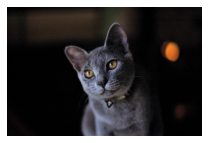

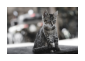

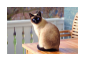

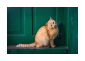

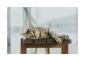

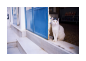

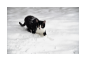

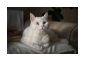

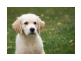

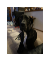

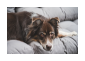

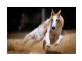

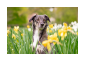

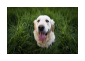

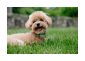

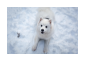

In [22]:
nrows = 4 
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)
pic_index = 100
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

next_cat_pix = [os.path.join(train_cats_dir,fname)
               for fname in train_cat_fnames[pic_index-8:pic_index]
               ]

next_dog_pix = [os.path.join(train_dogs_dir,fname)
               for fname in train_dog_fnames[pic_index-8:pic_index]
               ]
for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    ## setting up subplot
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('Off')
    
    img=mpimg.imread(img_path)
    plt.imshow(img)
    plt.show()

### First Pre-trained model to implement is the: 
## VGG-16


Image augmentation since the dataset used here is lacking in size


In [23]:
train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range=40,
                                   width_shift_range=.2, height_shift_range=.2,
                                   shear_range=.2, zoom_range=.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [24]:
train_generator = train_datagen.flow_from_directory(train_dir, batch_size=20, 
                                                    class_mode='binary', target_size=(224,224))
validation_generator = test_datagen.flow_from_directory(validation_dir, batch_size=20, 
                                                    class_mode='binary', target_size=(224,224))

Found 320 images belonging to 2 classes.
Found 162 images belonging to 2 classes.


* Load Base Model of the VGG

In [25]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape=(224,224,3), 
                   include_top = False, # leave out laft FC layer
                   weights='imagenet')


* No need to train all layers

In [26]:
for layer in base_model.layers:
    layer.trainable = False

###### Compile with normal settings
* Fine Tuning later

In [27]:
# Flatten to 1 dim
x = Flatten()(base_model.output)

# FC layer with the 512 hidden units and a ReLU 
x = Dense(512, activation='relu')(x)

# Setting the dropout for .5 for now as def, but will decrease later if no hyper parameter tuning is done
x = Dropout(0.5)(x)

# Sigmoid for output
x = layers.Dense(1,activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input,x)
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=.0001), 
              loss='binary_crossentropy',metrics=['acc'])


In [29]:
vgghist = model.fit(train_generator, 
                    validation_data=validation_generator,
                    steps_per_epoch=16, epochs=10)

Epoch 1/10
14/16 [=========================>....] - ETA: 13s - loss: 0.5170 - acc: 0.7536

KeyboardInterrupt: 